# 图像直方图

## 1. 直方图的概念

- 一般直方图
    - 横坐标：图像中各个像素点的灰度级
    - 纵坐标：具有该灰度级的像素点的个数
- 归一化直方图
    - 横坐标：图像中各个像素点的灰度级
    - 纵坐标：出现该灰度级的概率
    - 归一化后形状与一般直方图一样，只是纵坐标的尺度改变了
- 参数
    - dims: 使用参数的数量。dims=1, 对灰度直方图，只考虑灰度的情况(0-255)（其他如考虑亮度等，dims可能不等于1）
    - bins：参数子集的数目，即横坐标划分为多少个区域
    - range: 统计灰度值的范围，一般为0-255（最小值，黑色，0；最大值，白色，255）

## 2. 绘制直方图（使用matplotlib库hist函数）

- hist函数绘制直方图
    - 语法：hist(数据源data，像素级)
        - 数据源：图像，需要处理成一维数组
            - 用ravel函数处理: 一维数组=多维数组.ravel()
        - 像素级：一般是256，指0-255

In [1]:
import matplotlib.pyplot as plt
import cv2
# %matplotlib inline

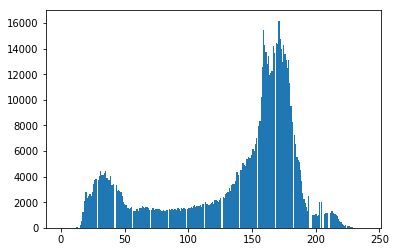

In [9]:
a = cv2.imread('image/add/boat.bmp')
b = a.ravel()
plt.hist(b, 256)
plt.show()

## 3. 使用opencv统计直方图信息

- calcHist()函数：求每个灰度级（0-255）对应的像素点个数
    - hist = cv2.calcHist(images, channels, mask, histSize, ranges [, accumulate])
        - 返回值hist：直方图
        - images: 原始图像，要用方括号括起来
        - channels: 指定通道,要用方括号括起来
            - 如果是灰度图像，该值为0
            - 如果是彩色图像，0、1、2分别对应B\G\R
        - mask: 掩码图像
            - 如果要统计整个图像的直方图，则设为None
            - 统计图像某一部分的直方图时，需要设定掩码图像
        - histSize: 要计算的bins的数量，需要用中括号括起来，一般是[256]
        - ranges：像素值的范围，一般是0-255，需要用中括号括起来
        - accumulate：累计（叠加）标识
            - 可选，默认值为false，一般不用
            - 如果为设为true, 则直方图在开始分配时不会被清零
            - 该参数允许从多个对象中计算单个直方图，或者用于实时更新直方图
            - 多个直方图的累计结果，用于对一组（多个）图像计算直方图

In [18]:
img = cv2.imread('image/lena.bmp')
hist = cv2.calcHist([img], [0], None, [256], [0, 255])

print(type(hist))
print(hist.size) # 256
print(hist.shape)  # (256, 1)
# print(hist)

<class 'numpy.ndarray'>
256
(256, 1)


## 4. 绘制opencv统计直方图

- 使用cv2.calcHist计算直方图信息
- 使用plt.plot绘制（各通道的）直方图

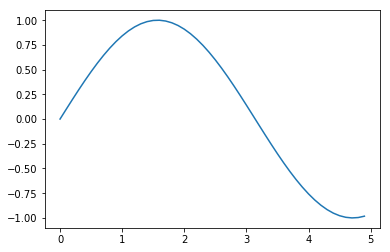

In [16]:
import numpy as np
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)
plt.show()

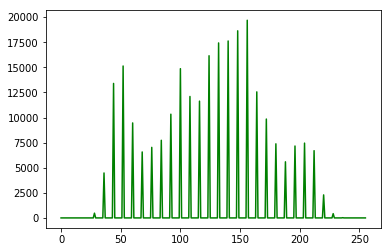

In [17]:
plt.plot(hist, color='g')
plt.show()

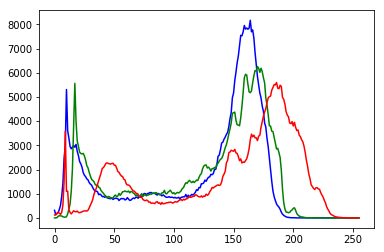

In [19]:
o = cv2.imread('image/girl.bmp')
histB = cv2.calcHist([o],[0],None,[256],[0,255])
histG = cv2.calcHist([o],[1],None,[256],[0,255])
histR = cv2.calcHist([o],[2],None,[256],[0,255])
plt.plot(histB, color='b')
plt.plot(histG, color='g')
plt.plot(histR, color='r')
plt.show()

## 5. 使用掩膜mask的直方图

- 掩膜
    - 用于保留原始图像中的某一个部分，将其他部分覆盖掉
- 生成掩膜
    - 先生成一个全黑的图像
        - mask = np.zeros(image.shape, np.uint8) 要生成一个与要操作的图像大小一样的图像
    - 将生成的图像中的一部分调整为白色
        - mask[200:400, 200:400] = 255
    - 或者用bitwise_and()函数
        - masked_img = cv2.bitwise_and(img, mask)
- 使用掩膜
    - 生成统计直方图信息
        - hist = cv2.calcHist(images, channels, mask, histSize, ranges [, accumulate])
        - 参数mask换成生成的掩膜图像
    - 使用plt.plot绘制掩膜的直方图

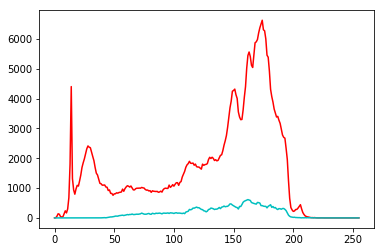

In [24]:
o = cv2.imread('image/girl.bmp', cv2.IMREAD_GRAYSCALE)
mask = np.zeros(o.shape, np.uint8)
mask[200:400, 200:400] = 255
histM = cv2.calcHist([o], [0], mask, [256], [0, 255])
histImage = cv2.calcHist([o],[0], None, [256], [0, 255])
plt.plot(histImage, color='red')
plt.plot(histM, color='c')
plt.show()

## 6. 掩膜处理: 生成掩膜图像

- 生成掩膜图像
    - 先生成一个全黑图像
        - mask = np.zeros(image.shape, np.uint8) 要生成一个与要操作的图像大小一样的图像
    - 将生成的图像中的一部分调整为白色
        - mask[200:400, 200:400] = 255
    - 用bitwise_and()函数生成掩膜图像
        - masked_img = cv2.bitwise_and(img, mask)

In [29]:
o = cv2.imread('image/girl.bmp')
mask = np.zeros(o.shape, np.uint8)
mask[200:500, 200:500] = 255
masked_img = cv2.bitwise_and(o, mask)

cv2.imshow('masked', masked_img)
cv2.imshow('mask',mask)
cv2.waitKey()
cv2.destroyAllWindows()

## 7. 直方图均衡化处理

- 直方图均衡化：简单说就是将直方图拉伸，让其在灰度级区间内更均匀地分布
- 理论基础
    - 前提：如果一幅图像占有全部可能的灰度级，并且均匀分布
    - 结论：该图像具有高对比度和多变的灰度色调
    - 外观：图像细节丰富，质量更高，不会出现过亮或过暗的情况
- 算法：
    - 计算累计直方图（归一化处理的累计直方图）
    - 将累计直方图进行区间转换：用归一化处理后的累计直方图各个点的概率值乘以灰度区间的最大值（如255）
    - 在累计直方图中，概率相近的原始值，会被处理为相同的值（对人眼不能分辨的差异值处理为同一值）
- 应用场景
    - 医疗图像处理
    - 车牌识别
    - 人脸识别
- 直方图均衡化函数equalizeHist
    - dst = cv2.equalizeHist(src) 
        - 返回值dst为对直方图进行均衡化处理后的目标图像
        - 参数只有一个，即原始图像，要求是一个8位的位图（0-255）

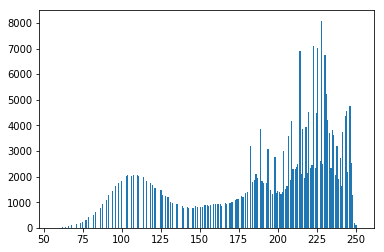

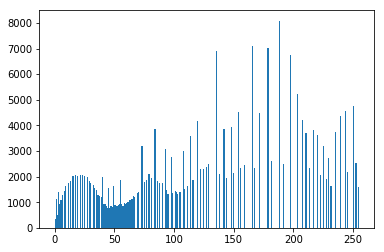

In [3]:
img = cv2.imread('image/equ.bmp', cv2.IMREAD_GRAYSCALE)
equalized_img = cv2.equalizeHist(img)

plt.hist(img.ravel(), 256)
plt.figure()   # 新建一个窗口
plt.hist(equalized_img.ravel(), 256)


cv2.imshow('original', img)
cv2.imshow('equalized image', equalized_img)
cv2.waitKey()
cv2.destroyAllWindows()

## 8. plt.subplot\plt.imshow函数的使用

- subplot(nrows, ncols, plot_number) 
    - nrows: 划分的行数
    - ncols: 划分的列数
    - plot_number: 绘制窗口的序号
- imshow(X, cmap=None)
    - X: 原始图像
    - cmap: 颜色图谱，默认为RGB(A)颜色空间
        - 灰度图像：cmap=plt.cm.gray
        - 彩色图像：如果使用opencv读入的图像，默认空间为BGR,需要转换成RGB通道顺序的图像

(-0.5, 719.5, 575.5, -0.5)

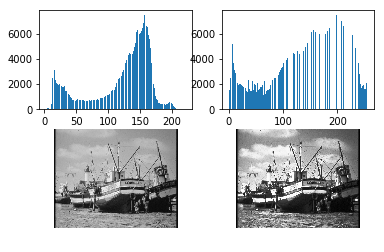

In [19]:
img = cv2.imread('image/boatGray.bmp', 0)
equalized_img = cv2.equalizeHist(img)

plt.subplot(221);plt.hist(img.ravel(), 256)
plt.subplot(222);plt.hist(equalized_img.ravel(), 256)
plt.subplot(223);plt.imshow(img, cmap=plt.cm.gray);plt.axis('off')
plt.subplot(224);plt.imshow(equalized_img, cmap=plt.cm.gray);plt.axis('off')


(-0.5, 719.5, 575.5, -0.5)

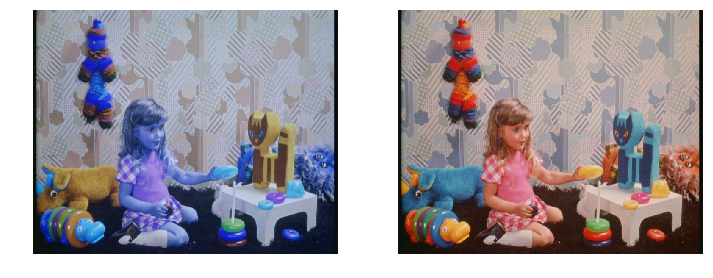

In [17]:
img = cv2.imread('image/girl.bmp')
b, g, r = cv2.split(img)
img_rgb = cv2.merge([r, g, b])
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.subplot(122)
plt.imshow(img_rgb)
plt.axis('off')

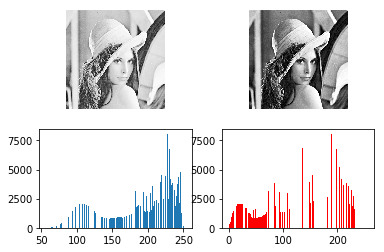

In [22]:
img = cv2.imread('image/equ.bmp', 0)
equalized_img = cv2.equalizeHist(img)

plt.subplot(221);plt.imshow(img, cmap=plt.cm.gray);plt.axis('off')
plt.subplot(222);plt.imshow(equalized_img, cmap=plt.cm.gray);plt.axis('off')
plt.subplot(223);plt.hist(img.ravel(), 256)
plt.subplot(224);plt.hist(equalized_img.ravel(), 256, color='red')
plt.show()